# Feature Engineering with SHAP values Experiment 1

SHAP Images of server with different number of poisoned clients
* number of malicious clients [0,1,2,3,4,5]

SHAP Images right after poisoning attack
* number of malicious clients [1,2,3,4,5]

Summation of Differences SHAP Images right after poisoning attack
* rounds [1,2,10,75,200]
* 5 times

## Google Colab

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')
sys.path.append('/content/drive/My Drive/Colab Notebooks/federated_learning')

In [ ]:
!pip install shap==0.40.0

## Experiments

In [3]:
from federated_learning.utils import SHAPUtil, experiment_util, Visualizer
from federated_learning import ClientPlane, Configuration, ObserverConfiguration
from federated_learning.server import Server
from datetime import datetime

In [9]:
import torch
from federated_learning.nets import MNISTCNN
def load_default_model(config):
    """
    Load a model from a file to achive a common default behavior
    """
    path = os.path.join('temp/models/MNISTtrained.model')
    if os.path.exists(path):
        try:
            model = MNISTCNN
            model.load_state_dict(torch.load(path))
            model.eval()
        except:
            print("Couldn't load model")
    else:
        print("Could not find model: {}")
    return model

## MNIST
(1) 5 → 4,
(2) 1 → 7,
(3) 3 → 8,

In [10]:
from federated_learning.nets import MNISTCNN
from federated_learning.dataset import MNISTDataset
import os
config = Configuration()
config.POISONED_CLIENTS = 0
config.DATA_POISONING_PERCENTAGE = 1
config.DATASET = MNISTDataset
config.MODELNAME = config.MNIST_NAME
config.NETWORK = MNISTCNN
observer_config = ObserverConfiguration()
observer_config.experiment_type = "shap_fl_poisoned"
observer_config.experiment_id = 1
observer_config.test = False
observer_config.datasetObserverConfiguration = "MNIST"
neutral_label = 2

In [ ]:
# Google Colab Settigns
config.TEMP = os.path.join('/content/drive/My Drive/Colab Notebooks/temp')
config.FMNIST_DATASET_PATH = os.path.join('/content/data/fmnist')
config.MNIST_DATASET_PATH = os.path.join('/content/data/mnist')
config.CIFAR10_DATASET_PATH = os.path.join('/content/data/cifar10')
config.VM_URL = "none"

In [6]:
data = config.DATASET(config)
shap_util = SHAPUtil(data.test_dataloader) 
server = Server(config, observer_config,data.train_dataloader, data.test_dataloader, shap_util)
client_plane = ClientPlane(config, observer_config, data, shap_util)
visualizer = Visualizer(shap_util)

MNIST training data loaded.
MNIST test data loaded.
Create 200 clients with dataset of size 300


In [ ]:
import numpy as np
import copy
for i in range(199):
    experiment_util.set_rounds(client_plane, server, i+1)
    experiment_util.run_round(client_plane, server, i+1)
print("Run 199 finished")
old_params = copy.deepcopy(server.get_nn_parameters())

### alpha (5,4)

In [ ]:
config.FROM_LABEL = 1
config.TO_LABEL = 7

accuracies = []
recalls = []

import torch
torch.save(server.net.state_dict(), "temp/models/MNISTtrained.model")

In [ ]:
for j in range(config.CLIENTS_PER_ROUND + 1):
    server.update_nn_parameters(old_params)
    server.test()
    recall, precision, accuracy = server.analize_test()
    print("Original", recall, precision, accuracy)
    file_name = './results/ex3/MNIST/5_4/_run_shap_values_{}_poisoned_clients_alpha_5_4.pdf'.format(j)
    config.POISONED_CLIENTS = j
    experiment_util.update_configs(client_plane, server, config, observer_config)
    client_plane.poison_clients()
    clean_clients = experiment_util.select_random_clean(client_plane, config, config.CLIENTS_PER_ROUND - j)
    poisoned_clients = experiment_util.select_poisoned(client_plane, j)
    clients = [*clean_clients, *poisoned_clients]
    print(clients)
    experiment_util.run_round_with(clients, old_params, client_plane, server, 200)
    server.test()
    server_shap = server.get_shap_values()
    recall, precision, accuracy = server.analize_test()
    accuracies.append(accuracy)
    recalls.append(recall)
    visualizer.plot_shap_values(server_shap,file_name)
    print(recall, precision, accuracy)
    print("Poisoned clients: {}".format(j))

In [ ]:
# Run 0
print(accuracies)
print(recalls)

In [ ]:
# Run 1
print(accuracies[6:])
print(recalls[6:])

In [ ]:
# Run 2
print(accuracies[12:])
print(recalls[12:])

In [ ]:
# Run 3
print(accuracies)
print(recalls)

In [ ]:
# Run 4
print(accuracies)
print(recalls)

### alpha (1,7)

In [17]:
import copy
import torch
from federated_learning.nets import MNISTCNN
config.FROM_LABEL = 1
config.TO_LABEL = 7

accuracies = []
recalls = []
server.net =  MNISTCNN()
server.net.load_state_dict(torch.load('temp/models/MNISTtrained.model'))
old_params = copy.deepcopy(server.get_nn_parameters())

In [18]:
import torch
torch.save(server.net.state_dict(), "temp/models/MNISTtrained.model")


Test set: Average loss: 0.0003, Accuracy: 8892/10000 (89%)

Original tensor([0.9908, 0.9903, 0.9806, 0.9653, 0.9837, 0.0359, 0.9749, 0.9523, 0.9528,
        0.9623]) tensor([0.9614, 0.9877, 0.9592, 0.9692, 0.5448, 1.0000, 0.9780, 0.9598, 0.9557,
        0.9337]) 0.8892
No poisoning due to 0. poisoned clients
[173, 198, 66, 1, 96]
Train Epoch: 200 [0/300 (0%)]	Loss: 0.481620
Train Epoch: 200 [10/300 (3%)]	Loss: 0.075695
Train Epoch: 200 [20/300 (7%)]	Loss: 0.567517
Train Epoch: 200 [30/300 (10%)]	Loss: 0.895879
Train Epoch: 200 [40/300 (13%)]	Loss: 0.067287
Train Epoch: 200 [50/300 (17%)]	Loss: 0.065916
Train Epoch: 200 [60/300 (20%)]	Loss: 0.396261
Train Epoch: 200 [70/300 (23%)]	Loss: 0.126060
Train Epoch: 200 [80/300 (27%)]	Loss: 0.351350
Train Epoch: 200 [90/300 (30%)]	Loss: 0.599017
Train Epoch: 200 [100/300 (33%)]	Loss: 0.182872
Train Epoch: 200 [110/300 (37%)]	Loss: 1.171636
Train Epoch: 200 [120/300 (40%)]	Loss: 0.492038
Train Epoch: 200 [130/300 (43%)]	Loss: 0.594634
Train Epo

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.


make picture
Make picture
tensor([0.9939, 0.9841, 0.9816, 0.9733, 0.9633, 0.9496, 0.9760, 0.9718, 0.9446,
        0.9722]) tensor([0.9663, 0.9920, 0.9666, 0.9675, 0.9803, 0.9883, 0.9894, 0.9487, 0.9684,
        0.9506]) 0.9715
Poisoned clients: 1

Test set: Average loss: 0.0003, Accuracy: 8892/10000 (89%)

Original tensor([0.9908, 0.9903, 0.9806, 0.9653, 0.9837, 0.0359, 0.9749, 0.9523, 0.9528,
        0.9623]) tensor([0.9614, 0.9877, 0.9592, 0.9692, 0.5448, 1.0000, 0.9780, 0.9598, 0.9557,
        0.9337]) 0.8892
Poison 2/200 clients
Flip 100.0% of the 1 labels to 7
[76 22]
[105, 81, 88, 76, 22]
Train Epoch: 200 [0/300 (0%)]	Loss: 0.012043
Train Epoch: 200 [10/300 (3%)]	Loss: 0.669959
Train Epoch: 200 [20/300 (7%)]	Loss: 0.259148
Train Epoch: 200 [30/300 (10%)]	Loss: 0.146816
Train Epoch: 200 [40/300 (13%)]	Loss: 0.585071
Train Epoch: 200 [50/300 (17%)]	Loss: 0.494709
Train Epoch: 200 [60/300 (20%)]	Loss: 0.111619
Train Epoch: 200 [70/300 (23%)]	Loss: 0.269258
Train Epoch: 200 [80/300 (

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.


make picture
Make picture
tensor([0.9929, 0.9718, 0.9806, 0.9792, 0.9695, 0.9630, 0.9833, 0.9728, 0.9507,
        0.9683]) tensor([0.9720, 0.9964, 0.9731, 0.9677, 0.9845, 0.9896, 0.9854, 0.9479, 0.9636,
        0.9550]) 0.9733
Poisoned clients: 2

Test set: Average loss: 0.0003, Accuracy: 8892/10000 (89%)

Original tensor([0.9908, 0.9903, 0.9806, 0.9653, 0.9837, 0.0359, 0.9749, 0.9523, 0.9528,
        0.9623]) tensor([0.9614, 0.9877, 0.9592, 0.9692, 0.5448, 1.0000, 0.9780, 0.9598, 0.9557,
        0.9337]) 0.8892
Poison 3/200 clients
Flip 100.0% of the 1 labels to 7
[ 7 33 80]
[71, 96, 7, 33, 80]
Train Epoch: 200 [0/300 (0%)]	Loss: 0.733574
Train Epoch: 200 [10/300 (3%)]	Loss: 0.450742
Train Epoch: 200 [20/300 (7%)]	Loss: 0.128965
Train Epoch: 200 [30/300 (10%)]	Loss: 0.390526
Train Epoch: 200 [40/300 (13%)]	Loss: 0.647870
Train Epoch: 200 [50/300 (17%)]	Loss: 0.076694
Train Epoch: 200 [60/300 (20%)]	Loss: 0.122309
Train Epoch: 200 [70/300 (23%)]	Loss: 0.564348
Train Epoch: 200 [80/300 

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.


make picture
Make picture
tensor([0.9939, 0.8097, 0.9855, 0.9752, 0.9603, 0.9563, 0.9791, 0.9679, 0.9456,
        0.9772]) tensor([0.9730, 0.9989, 0.9576, 0.9619, 0.9864, 0.9873, 0.9863, 0.8142, 0.9644,
        0.9435]) 0.9531
Poisoned clients: 3

Test set: Average loss: 0.0003, Accuracy: 8892/10000 (89%)

Original tensor([0.9908, 0.9903, 0.9806, 0.9653, 0.9837, 0.0359, 0.9749, 0.9523, 0.9528,
        0.9623]) tensor([0.9614, 0.9877, 0.9592, 0.9692, 0.5448, 1.0000, 0.9780, 0.9598, 0.9557,
        0.9337]) 0.8892
Poison 4/200 clients
Flip 100.0% of the 1 labels to 7
[ 99 149 195  16]
[9, 99, 149, 195, 16]
Train Epoch: 200 [0/300 (0%)]	Loss: 1.191009
Train Epoch: 200 [10/300 (3%)]	Loss: 0.170627
Train Epoch: 200 [20/300 (7%)]	Loss: 0.027763
Train Epoch: 200 [30/300 (10%)]	Loss: 0.054944
Train Epoch: 200 [40/300 (13%)]	Loss: 0.381853
Train Epoch: 200 [50/300 (17%)]	Loss: 0.323558
Train Epoch: 200 [60/300 (20%)]	Loss: 0.273229
Train Epoch: 200 [70/300 (23%)]	Loss: 0.116483
Train Epoch: 200

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.


make picture
Make picture
tensor([0.9929, 0.1225, 0.9622, 0.9772, 0.9511, 0.9271, 0.9770, 0.9825, 0.9415,
        0.9673]) tensor([0.9701, 0.9929, 0.9660, 0.9400, 0.9863, 0.9892, 0.9905, 0.4875, 0.9602,
        0.9531]) 0.8692
Poisoned clients: 4

Test set: Average loss: 0.0003, Accuracy: 8892/10000 (89%)

Original tensor([0.9908, 0.9903, 0.9806, 0.9653, 0.9837, 0.0359, 0.9749, 0.9523, 0.9528,
        0.9623]) tensor([0.9614, 0.9877, 0.9592, 0.9692, 0.5448, 1.0000, 0.9780, 0.9598, 0.9557,
        0.9337]) 0.8892
Poison 5/200 clients
Flip 100.0% of the 1 labels to 7
[ 26 163 128 125  27]
[26, 163, 128, 125, 27]
Train Epoch: 200 [0/300 (0%)]	Loss: 1.585214
Train Epoch: 200 [10/300 (3%)]	Loss: 1.187087
Train Epoch: 200 [20/300 (7%)]	Loss: 0.706595
Train Epoch: 200 [30/300 (10%)]	Loss: 0.986114
Train Epoch: 200 [40/300 (13%)]	Loss: 0.945416
Train Epoch: 200 [50/300 (17%)]	Loss: 0.567937
Train Epoch: 200 [60/300 (20%)]	Loss: 0.643942
Train Epoch: 200 [70/300 (23%)]	Loss: 0.290718
Train Epoc

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.


make picture
Make picture
tensor([0.9929, 0.0123, 0.9680, 0.9644, 0.9623, 0.9585, 0.9812, 0.9815, 0.9384,
        0.9722]) tensor([0.9662, 1.0000, 0.9671, 0.9730, 0.9813, 0.9828, 0.9884, 0.4618, 0.9703,
        0.9487]) 0.8604
Poisoned clients: 5


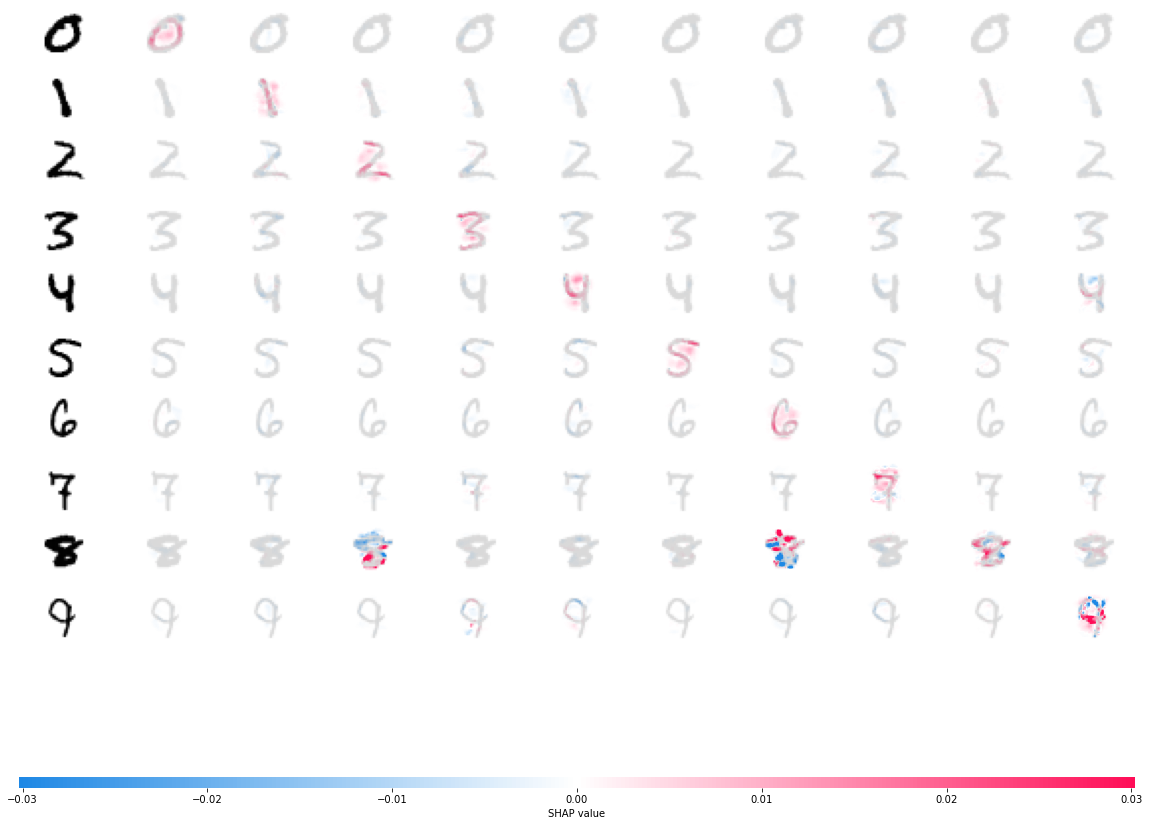

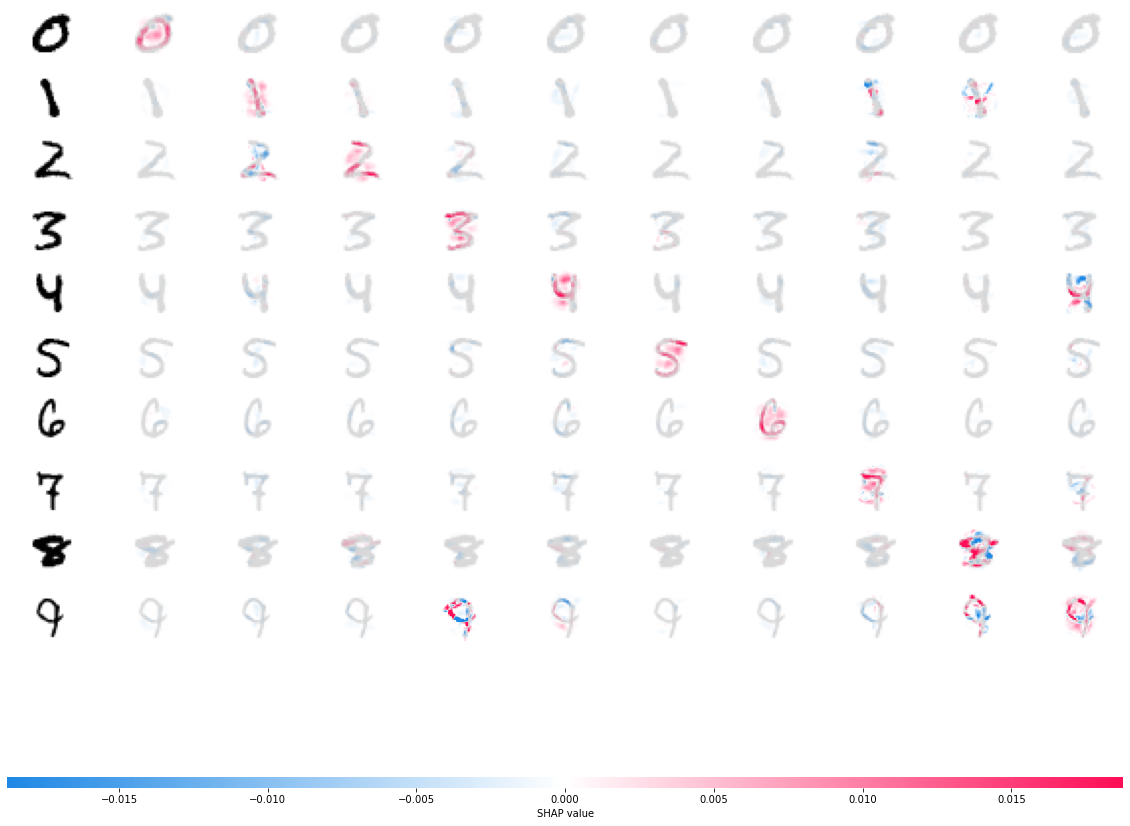

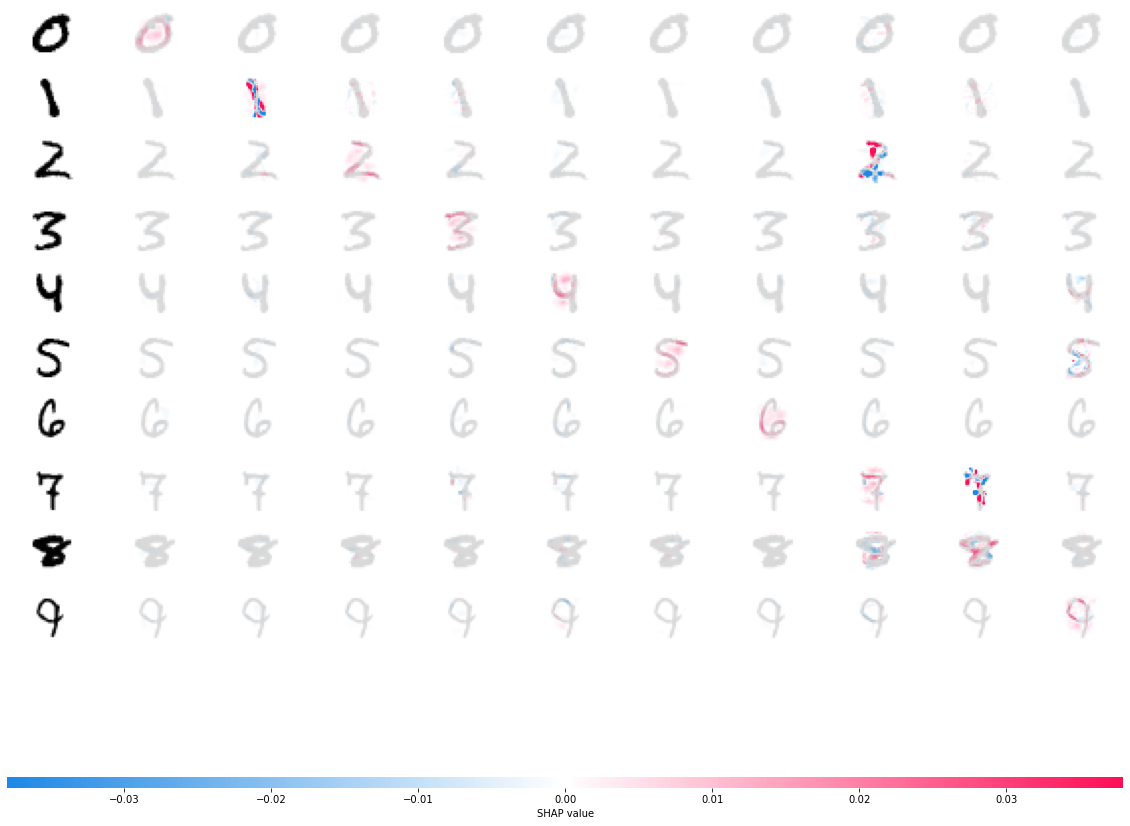

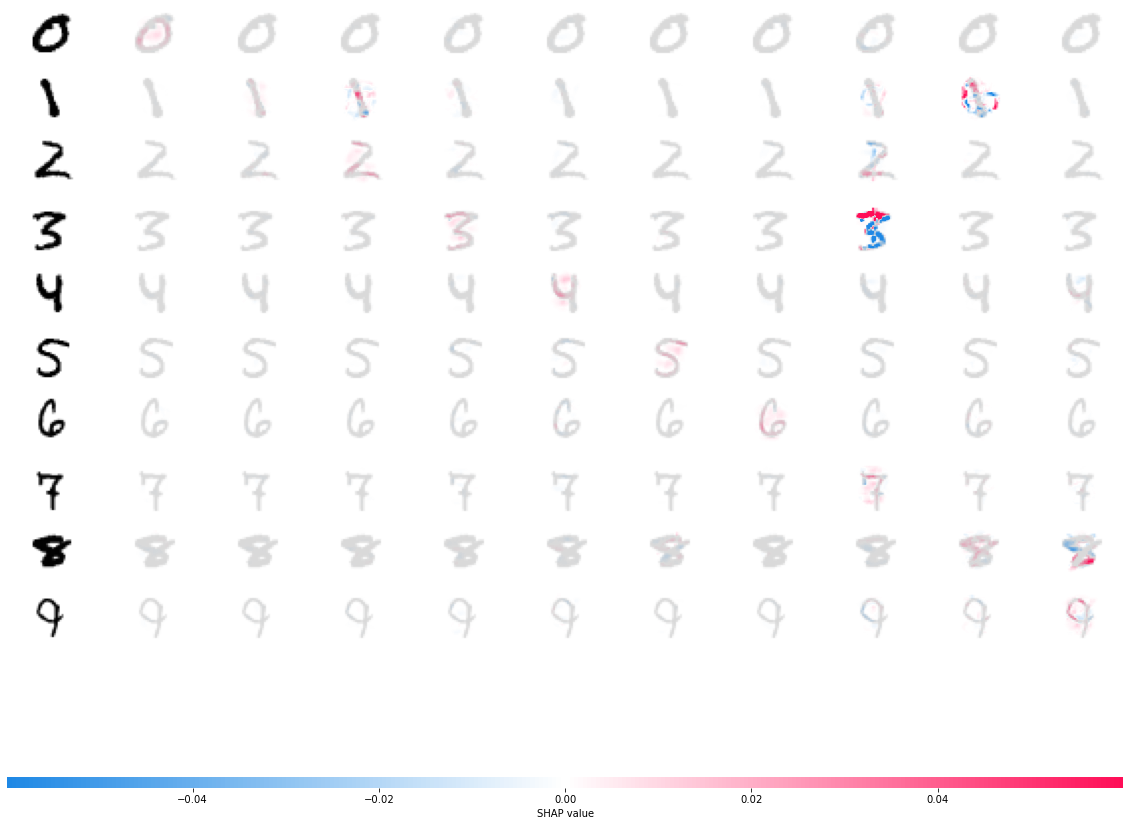

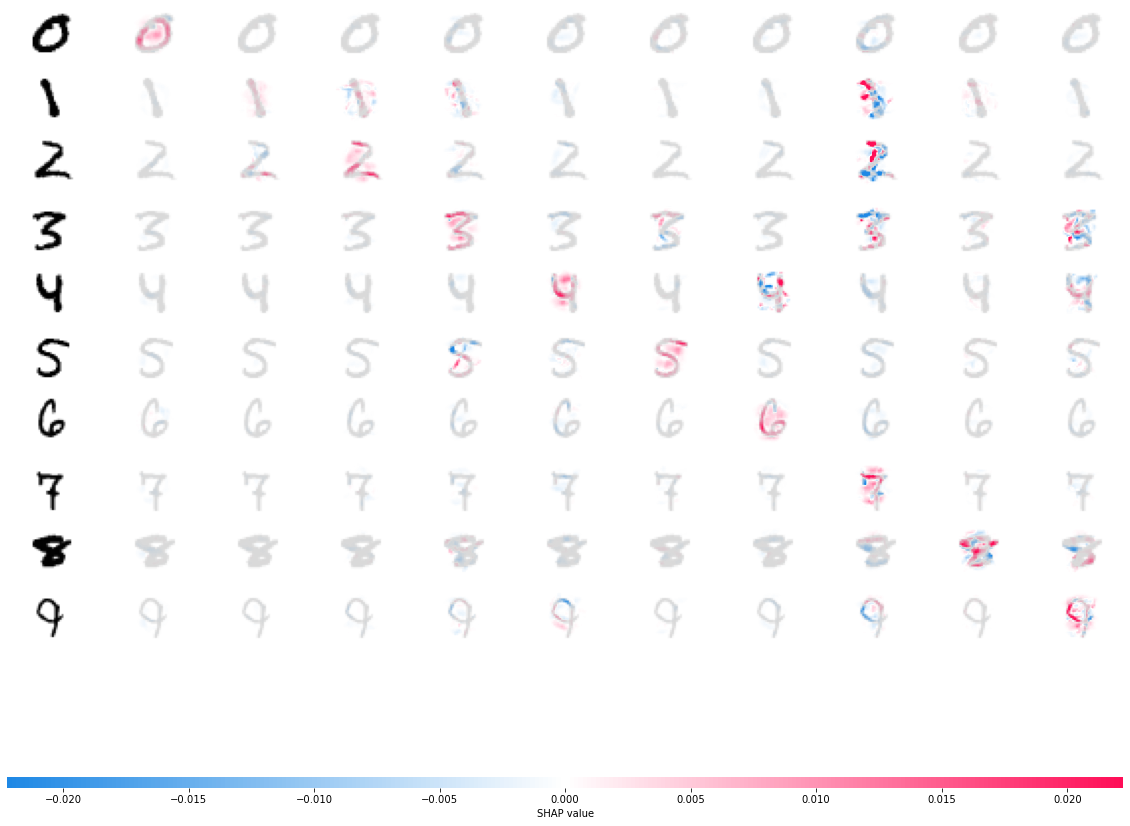

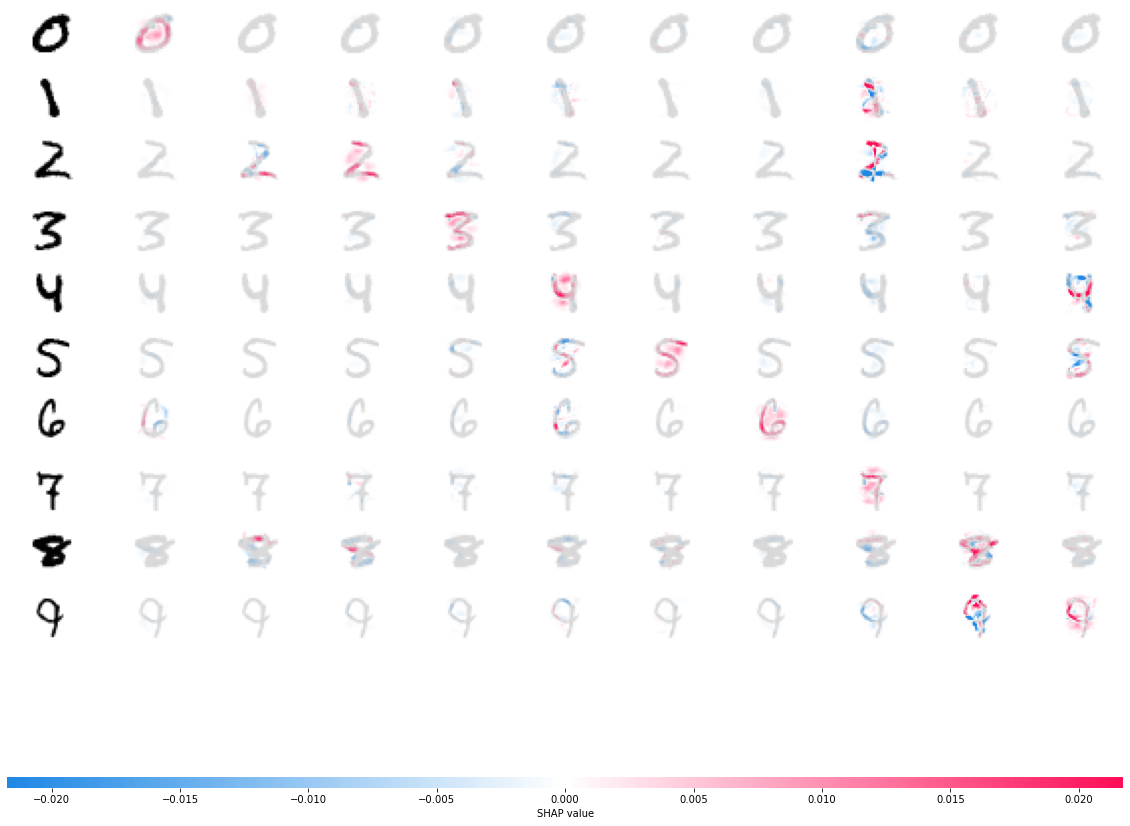

In [19]:
for j in range(config.CLIENTS_PER_ROUND + 1):
    server.update_nn_parameters(old_params)
    server.test()
    recall, precision, accuracy = server.analize_test()
    print("Original", recall, precision, accuracy)
    file_name = './results/ex3/MNIST/1_7/1_run_shap_values_{}_poisoned_clients_alpha_1_7.pdf'.format(j)
    config.POISONED_CLIENTS = j
    experiment_util.update_configs(client_plane, server, config, observer_config)
    client_plane.poison_clients()
    clean_clients = experiment_util.select_random_clean(client_plane, config, config.CLIENTS_PER_ROUND - j)
    poisoned_clients = experiment_util.select_poisoned(client_plane, j)
    clients = [*clean_clients, *poisoned_clients]
    print(clients)
    experiment_util.run_round_with(clients, old_params, client_plane, server, 200)
    server.test()
    server_shap = server.get_shap_values()
    recall, precision, accuracy = server.analize_test()
    accuracies.append(accuracy)
    recalls.append(recall)
    visualizer.plot_shap_values(server_shap,file_name)
    print(recall, precision, accuracy)
    print("Poisoned clients: {}".format(j))

In [20]:
# Run 0
print(accuracies)
print(recalls)

[0.973, 0.9715, 0.9733, 0.9531, 0.8692, 0.8604]
[tensor([0.9878, 0.9912, 0.9797, 0.9772, 0.9674, 0.9428, 0.9864, 0.9708, 0.9487,
        0.9722]), tensor([0.9939, 0.9841, 0.9816, 0.9733, 0.9633, 0.9496, 0.9760, 0.9718, 0.9446,
        0.9722]), tensor([0.9929, 0.9718, 0.9806, 0.9792, 0.9695, 0.9630, 0.9833, 0.9728, 0.9507,
        0.9683]), tensor([0.9939, 0.8097, 0.9855, 0.9752, 0.9603, 0.9563, 0.9791, 0.9679, 0.9456,
        0.9772]), tensor([0.9929, 0.1225, 0.9622, 0.9772, 0.9511, 0.9271, 0.9770, 0.9825, 0.9415,
        0.9673]), tensor([0.9929, 0.0123, 0.9680, 0.9644, 0.9623, 0.9585, 0.9812, 0.9815, 0.9384,
        0.9722])]


### alpha (3,8)

In [13]:
import copy
import torch
from federated_learning.nets import MNISTCNN
config.FROM_LABEL = 1
config.TO_LABEL = 7

accuracies = []
recalls = []
server.net =  MNISTCNN()
server.net.load_state_dict(torch.load('temp/models/MNISTtrained.model'))
old_params = copy.deepcopy(server.get_nn_parameters())

In [14]:
for j in range(config.CLIENTS_PER_ROUND + 1):
    server.update_nn_parameters(old_params)
    server.test()
    recall, precision, accuracy = server.analize_test()
    print("Original", recall, precision, accuracy)
    file_name = './results/ex3/MNIST/1_7/0_run_shap_values_{}_poisoned_clients_alpha_1_7.pdf'.format(j)
    config.POISONED_CLIENTS = j
    experiment_util.update_configs(client_plane, server, config, observer_config)
    client_plane.poison_clients()
    clean_clients = experiment_util.select_random_clean(client_plane, config, config.CLIENTS_PER_ROUND - j)
    poisoned_clients = experiment_util.select_poisoned(client_plane, j)
    clients = [*clean_clients, *poisoned_clients]
    print(clients)
    experiment_util.run_round_with(clients, old_params, client_plane, server, 200)
    server.test()
    server_shap = server.get_shap_values()
    recall, precision, accuracy = server.analize_test()
    accuracies.append(accuracy)
    recalls.append(recall)
    visualizer.plot_shap_values(server_shap,file_name)
    print(recall, precision, accuracy)
    print("Poisoned clients: {}".format(j))


Test set: Average loss: 0.0003, Accuracy: 8892/10000 (89%)

Original tensor([0.9908, 0.9903, 0.9806, 0.9653, 0.9837, 0.0359, 0.9749, 0.9523, 0.9528,
        0.9623]) tensor([0.9614, 0.9877, 0.9592, 0.9692, 0.5448, 1.0000, 0.9780, 0.9598, 0.9557,
        0.9337]) 0.8892
No poisoning due to 0. poisoned clients
[66, 116, 84, 76, 141]
Train Epoch: 200 [0/300 (0%)]	Loss: 0.120056
Train Epoch: 200 [10/300 (3%)]	Loss: 1.143246
Train Epoch: 200 [20/300 (7%)]	Loss: 0.704628
Train Epoch: 200 [30/300 (10%)]	Loss: 0.036656
Train Epoch: 200 [40/300 (13%)]	Loss: 0.460575
Train Epoch: 200 [50/300 (17%)]	Loss: 0.316039
Train Epoch: 200 [60/300 (20%)]	Loss: 0.382182
Train Epoch: 200 [70/300 (23%)]	Loss: 0.190371
Train Epoch: 200 [80/300 (27%)]	Loss: 0.302125
Train Epoch: 200 [90/300 (30%)]	Loss: 0.180347
Train Epoch: 200 [100/300 (33%)]	Loss: 0.405224
Train Epoch: 200 [110/300 (37%)]	Loss: 0.575252
Train Epoch: 200 [120/300 (40%)]	Loss: 0.421468
Train Epoch: 200 [130/300 (43%)]	Loss: 0.467777
Train Ep


KeyboardInterrupt



### FashionMNIST
For Fashion-MNIST we experiment with 
(1) 5: sandal → 4: coat,
(2) 2: pullover → 3: shirt, and 
(3) 4: coat → 6: dress.
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker',  'Bag', 'Ankle Boot']
